# Migration Flow Graph Analysis

Building on notebook 01, we will now apply more advanced graph analysis techniques from Lab 2.

Before I get on to trying clustering, path length and degree distributions on the data, I conversed with my favourite Ai and it suggested I also try spring layout and centrality by degree and betweenness. These are all NetworX functions, so I think I'll try those first here then start another workbook covering what we did in the lecture.

**Code Goals:**
- To improve the graph visualisation with better layouts
- To visualise edge weights (migration flow sizes)
- To calculate and visualise node importance (centrality metrics)
- Identify key migration hubs

## Setup (re-loading)

The following code re-loads & rebuilds the graph from the prevoius notebook for us to continue building on. Any additions are commented as **# NEW!** . There were only minor updates made this time around. To understand anything here, check back over the previous workbook.

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import warnings # NEW! Added this time to supress benign warnings
warnings.filterwarnings('ignore', category=UserWarning) # NEW! Added this time to supress benign warnings
np.random.seed(99) # Set random seed for reproducibility
df = pd.read_csv('../data/bilat_mig.csv')# Load the migration data
# Rebuild the directed graph
G = nx.DiGraph()
for index, row in df.iterrows():
    if row['da_pb_closed'] > 0:
        G.add_edge(row['orig'], row['dest'], weight=row['da_pb_closed'])
print("Libraries loaded and graph rebuilt successfully!")
print(f"Graph: {G.number_of_nodes()} countries, {G.number_of_edges()} migration flows")

Libraries loaded and graph rebuilt successfully!
Graph: 10 countries, 88 migration flows


## Improved Visualisation

We will now use a spring layout, where:

- Nodes repel each other (like springs)
- Connected nodes attract each other
- Results in more natural clustering

C:\Users\zacba\AppData\Local\Temp\ipykernel_29020\3511461882.py:11: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


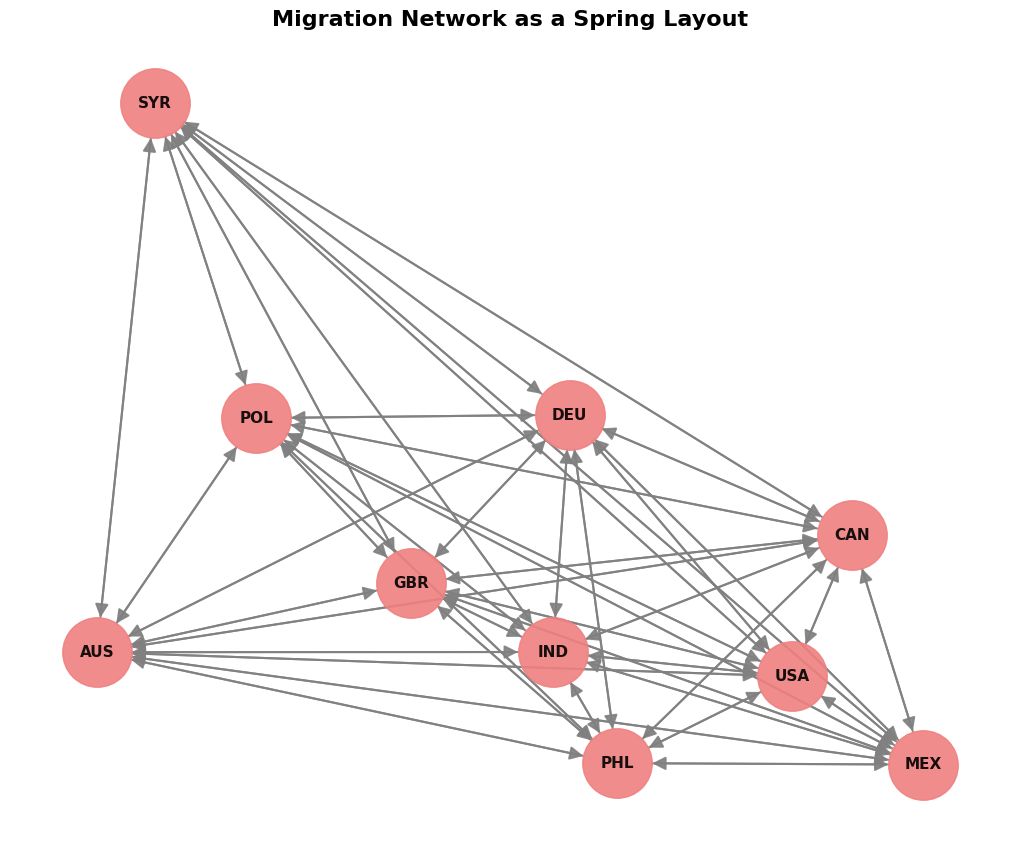

Spring layout visualisation complete!
Notice: Countries with stronger connections are positioned closer together


In [17]:
# Create a spring layout using physics simulation k controls the distance between nodes (higher = more spread out),
# iterations controls how long the simulation runs, seed ensures consistent layout each time

pos = nx.spring_layout(G, k=2, iterations=50, seed=99) #Runs physics simulation to position nodes, adjust k=2 for spacing but I can't see the difference?

# Draw the graph with spring layout
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_color='lightcoral', node_size=2500, font_size=11, font_weight='bold', arrows=True, arrowsize=20, edge_color='gray', width=1.5, alpha=0.9)

plt.title("Migration Network as a Spring Layout", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("Spring layout visualisation complete!")
print("Notice: Countries with stronger connections are positioned closer together")

## Visualisation Inference for Report

What this graph is illustrating is, in a world with just the 10 countries we've isolated, what would be the most 'attractive' based on connectivity to other countries. Over the iterations it seems England, India and the USA seem very centrally connected, with Australia and especially Syria being less so. All countries are well connected so this graph is (effectively) exadurating the difference. 

## Node Sizing by Migration Volume

Let's make node sizes proportional to total migration (in + out).

**Steps:**
- Calculate total incoming migration for each country
- Calculate total outgoing migration for each country
- Combine them to get total migration volume
- Use this to size nodes in visualization

TODO: Calculate migration volumes and visualize with sized nodes

Top Countries by Total Migration Volume (In + Out)
1. USA: 8,141,371 migrants (In: 5,793,462, Out: 2,347,909)
2. MEX: 3,944,677 migrants (In: 1,394,041, Out: 2,550,636)
3. IND: 3,738,698 migrants (In: 369,936, Out: 3,368,762)
4. GBR: 2,098,964 migrants (In: 1,036,271, Out: 1,062,693)
5. CAN: 1,683,726 migrants (In: 1,126,354, Out: 557,372)
6. DEU: 1,437,023 migrants (In: 986,755, Out: 450,268)
7. PHL: 1,363,629 migrants (In: 312,279, Out: 1,051,349)
8. AUS: 1,144,951 migrants (In: 749,921, Out: 395,031)
9. POL: 937,282 migrants (In: 496,880, Out: 440,402)
10. SYR: 94,438 migrants (In: 26,481, Out: 67,958)


C:\Users\zacba\AppData\Local\Temp\ipykernel_29020\3745067953.py:24: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


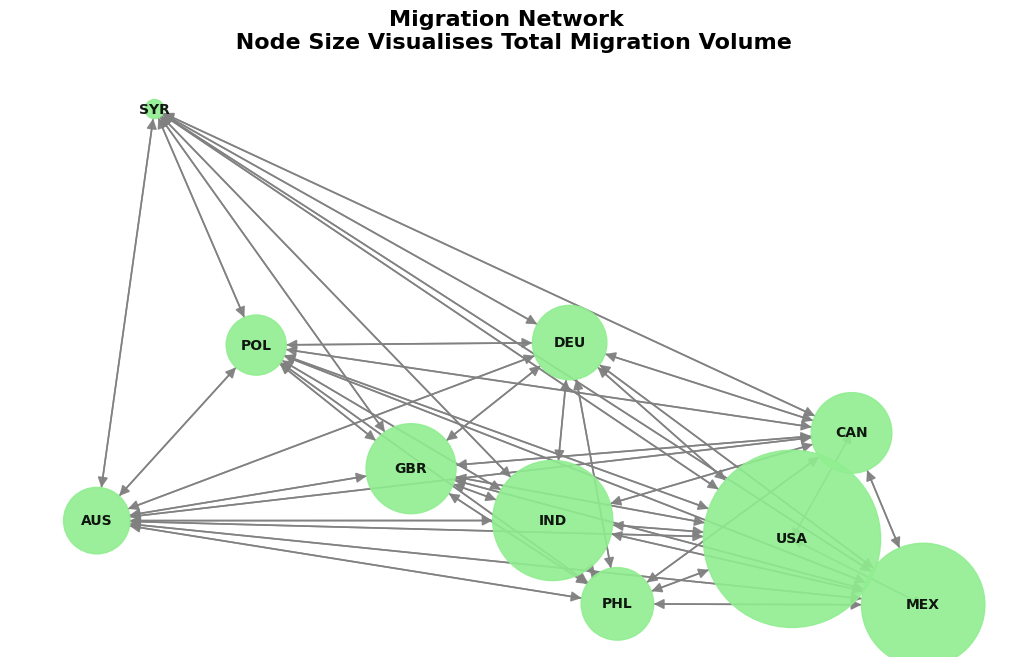

In [16]:
# Calculate weighted in-degree and out-degree for each country
in_migration = dict(G.in_degree(weight='weight'))
out_migration = dict(G.out_degree(weight='weight'))

# Calculate total migration volume (incoming + outgoing)
total_migration = {node: in_migration[node] + out_migration[node] for node in G.nodes()}

# Print top countries by migration volume
print("="*60)
print("Top Countries by Total Migration Volume (In + Out)")
print("="*60)
sorted_countries = sorted(total_migration.items(), key=lambda x: x[1], reverse=True)
for i, (country, volume) in enumerate(sorted_countries, 1):
    print(f"{i}. {country}: {volume:,.0f} migrants (In: {in_migration[country]:,.0f}, Out: {out_migration[country]:,.0f})")

# Visualize with node sizes proportional to migration volume
# Scale node sizes for visibility (divide by a constant)
node_sizes = [total_migration[node]/500 for node in G.nodes()]

plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=node_sizes, font_size=10, font_weight='bold', arrows=True, arrowsize=15, edge_color='gray', width=1.2, alpha=0.9)

plt.title("Migration Network \n Node Size Visualises Total Migration Volume", fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## Visualisation Inference for Report

The graph shows how large these countries are on the 'world stage' (the world = 10 countries) in regards to immigration. It doesn't comment on if they're inflows or outflows, I'll have to visualise this later. The connectivity between the USA & Mexico is further highlighted here as their circles overlap.

## Centrality Metrics

**Centrality** is a measure of node importance.

**Degree Centrality:**
- How many connections does a node have?
- High degree = well-connected country

**Betweenness Centrality:**
- How often does a node appear on shortest paths between other nodes?
- High betweenness = country is a "bridge" or "hub"

Top Countries by Degree Centrality (Connectivity)
1. IND: 2.000
2. POL: 2.000
3. GBR: 2.000
4. DEU: 2.000
5. MEX: 2.000

Top Countries by Betweenness Centrality (Bridge Position)
1. SYR: 0.847
2. MEX: 0.306
3. PHL: 0.222
4. POL: 0.139
5. IND: 0.000


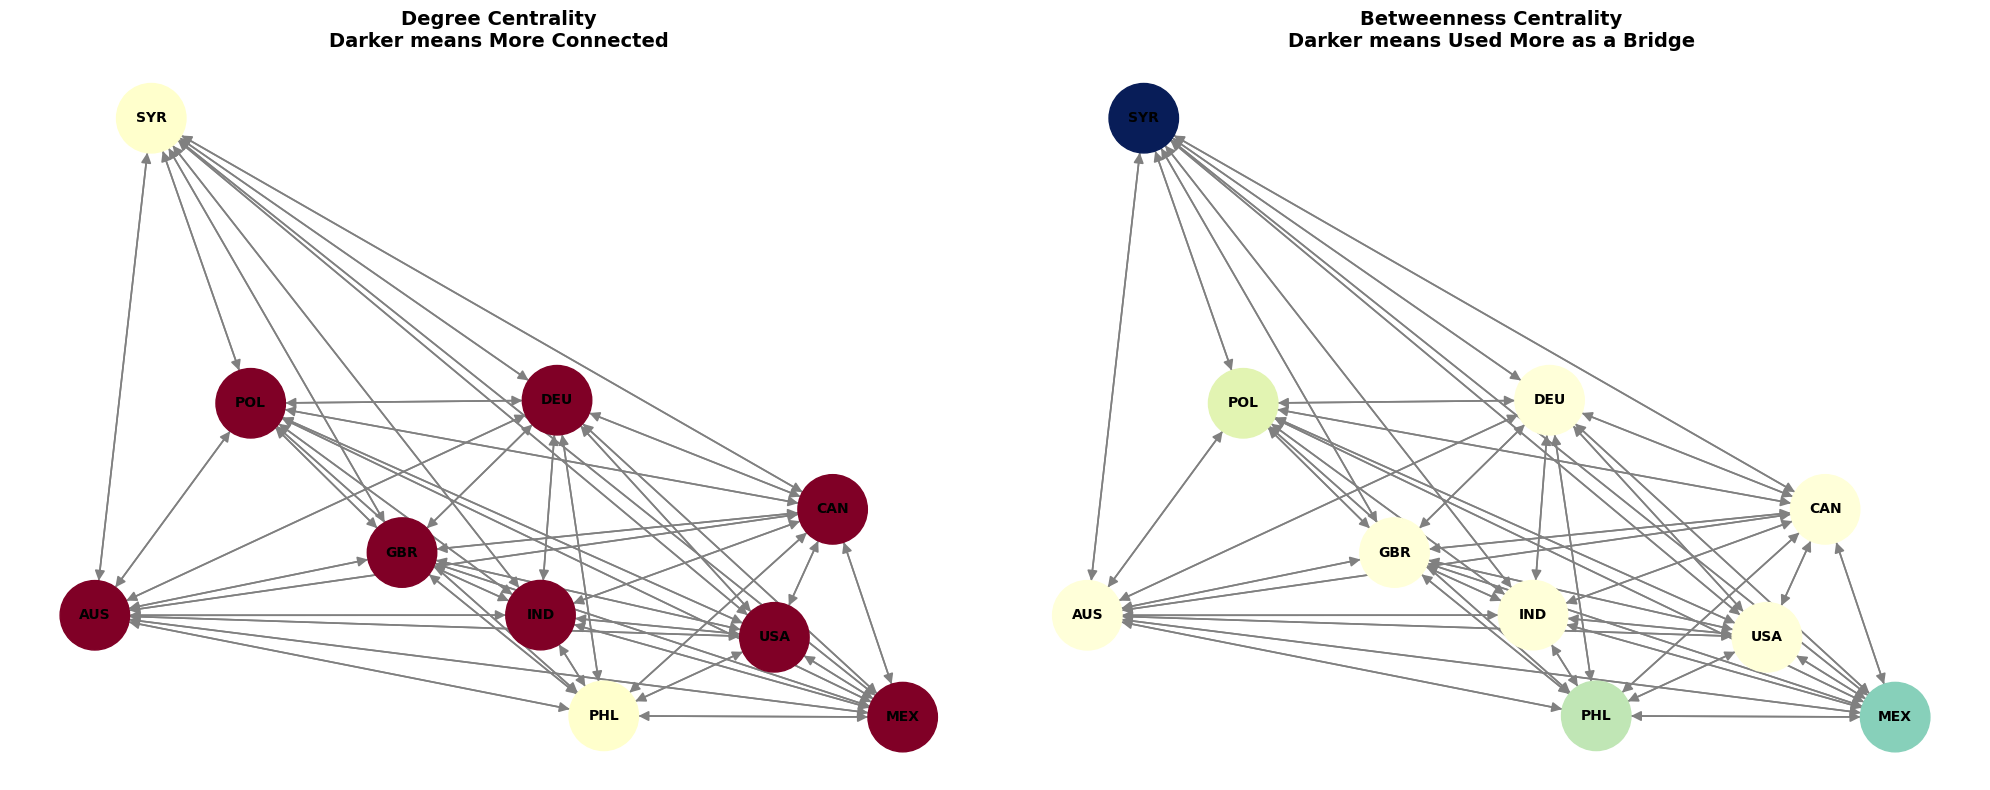

In [21]:
degree_centrality = nx.degree_centrality(G) # Calculate degree centrality (how well-connected is each country?)
betweenness_centrality = nx.betweenness_centrality(G, weight='weight') # Calculate betweenness centrality (how often is each country on paths betweenothers?)

print("="*60) # Print top countries by degree centrality
print("Top Countries by Degree Centrality (Connectivity)")
print("="*60)
sorted_degree = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)
for i, (country, score) in enumerate(sorted_degree[:5], 1):
    print(f"{i}. {country}: {score:.3f}")

print("\n" + "="*60)
print("Top Countries by Betweenness Centrality (Bridge Position)")
print("="*60)
sorted_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
for i, (country, score) in enumerate(sorted_betweenness[:5], 1):
    print(f"{i}. {country}: {score:.3f}")

# Create side-by-side visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Left plot: Degree centrality
node_colors_degree = [degree_centrality[node] for node in G.nodes()]
nx.draw(G, pos, ax=ax1, with_labels=True, node_color=node_colors_degree, cmap='YlOrRd', node_size=2500, font_size=10, font_weight='bold', arrows=True, arrowsize=15, edge_color='gray', width=1.2, vmin=min(node_colors_degree), vmax=max(node_colors_degree))
ax1.set_title("Degree Centrality\nDarker means More Connected", fontsize=14, fontweight='bold')

# Right plot: Betweenness centrality
node_colors_between = [betweenness_centrality[node] for node in G.nodes()] 
nx.draw(G, pos, ax=ax2, with_labels=True, node_color=node_colors_between, cmap='YlGnBu', node_size=2500, font_size=10, font_weight='bold', arrows=True, arrowsize=15, edge_color='gray', width=1.2, vmin=min(node_colors_between), vmax=max(node_colors_between))
ax2.set_title("Betweenness Centrality\nDarker means Used More as a Bridge", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## Visualisation Inference for Report

As most countries have the same number of connections directly to other nodes, the degree of centrality colours them all the same dark maroon. PHL & SYR are missing connections so look stark in comparison. degree_centrality = (number of connections) / (max possible connections). I'm not sure how useful or interesting this is.

In the second graph as most nodes are part of a (nearly) complete graph, there are alternate routes to certain places. However PHL, MEX and especially SYR have critical paths to countries that others do not - thus they are highlighted as bridges. This is very interesting, it quite prominently higlights nodes that control critical paths to other countries. 

Syria thus has Low connectivity, LOW total migration volume, but could be highly strategic as it is important as a bridge.
In contrast USA/GBR/DEU have high connectivity, high migration volume but low betweenness and are not critical bridges because everything connects directly.
In the real world this may mena Syria represent a unique migration corridor (Middle East --> Europe)

## Identify Key Migration Hubs

Which countries are the most important in the migration network? I'll create a bunch of chats here based on the above metrics and draw some inferences from them.

Migration Hub Rankings - All Metrics
Country  Total_Migration  In_Migration  Out_Migration  Degree_Centrality  Betweenness_Centrality
    USA       8141370.97    5793461.61     2347909.36           2.000000                0.000000
    MEX       3944677.02    1394041.36     2550635.66           2.000000                0.305556
    IND       3738697.82     369936.14     3368761.68           2.000000                0.000000
    GBR       2098963.75    1036271.02     1062692.73           2.000000                0.000000
    CAN       1683725.72    1126353.89      557371.83           2.000000                0.000000
    DEU       1437023.16     986754.74      450268.42           2.000000                0.000000
    PHL       1363628.93     312279.47     1051349.46           1.777778                0.222222
    AUS       1144951.46     749920.63      395030.83           2.000000                0.000000
    POL        937282.24     496880.22      440402.02           2.000000                0.

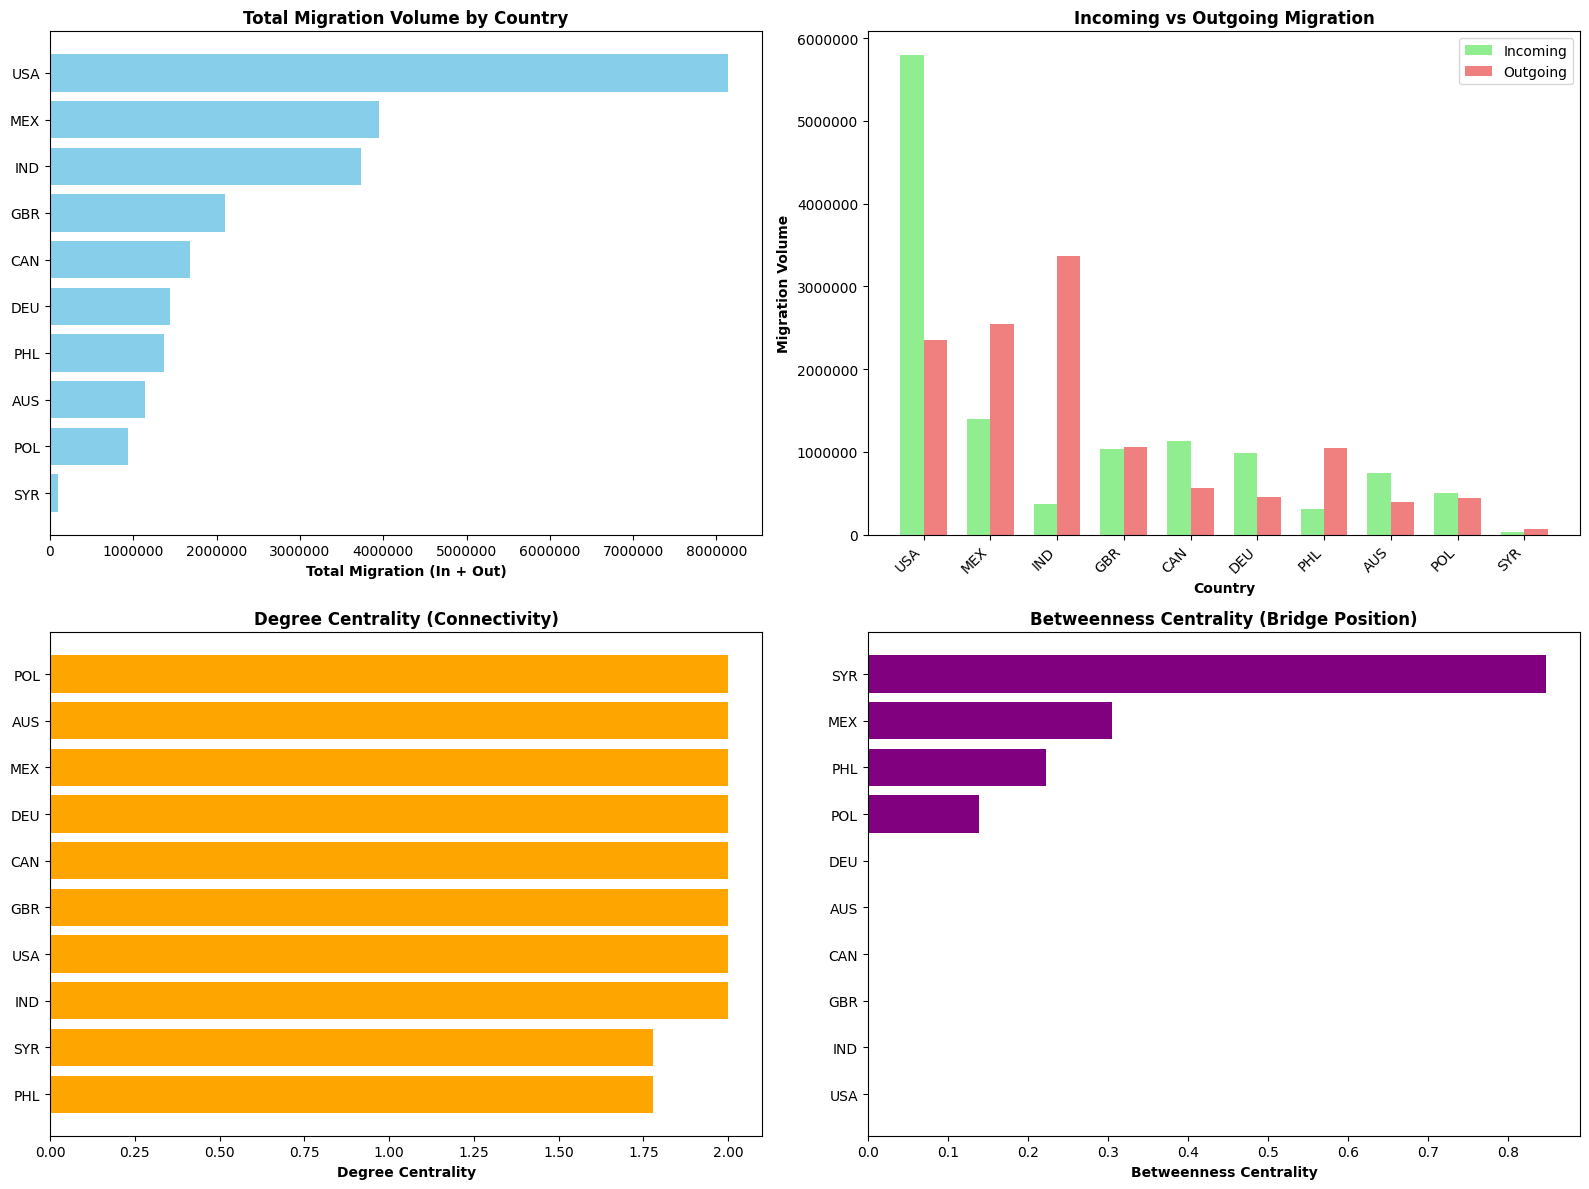


Analysis complete! Review the metrics above to identify key migration hubs.


In [22]:
# Create a summary DataFrame combining all metrics
summary_data = {'Country': list(G.nodes()), 'Total_Migration': [total_migration[node] for node in G.nodes()], 'In_Migration': [in_migration[node] for node in G.nodes()], 'Out_Migration': [out_migration[node] for node in G.nodes()], 'Degree_Centrality': [degree_centrality[node] for node in G.nodes()], 'Betweenness_Centrality': [betweenness_centrality[node] for node in G.nodes()] }
summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Total_Migration', ascending=False) # Sort by total migration volume
# Prints a summary table with all metrics in one place
print("="*80)
print("Migration Hub Rankings - All Metrics")
print("="*80)
print(summary_df.to_string(index=False))

fig, axes = plt.subplots(2, 2, figsize=(16, 12)) # Create a bar chart comparing countries

# Plot 1: Total Migration Volume (horizontal bar)
ax = axes[0, 0]
countries_sorted = summary_df.sort_values('Total_Migration', ascending=True)
ax.barh(countries_sorted['Country'], countries_sorted['Total_Migration'], color='skyblue')
ax.set_xlabel('Total Migration (In + Out)', fontweight='bold')
ax.set_title('Total Migration Volume by Country', fontweight='bold', fontsize=12)
ax.ticklabel_format(axis='x', style='plain')

# Plot 2: In vs Out Migration (grouped bars)
ax = axes[0, 1]
x = np.arange(len(summary_df))
width = 0.35
ax.bar(x - width/2, summary_df['In_Migration'], width, label='Incoming', color='lightgreen')
ax.bar(x + width/2, summary_df['Out_Migration'], width, label='Outgoing', color='lightcoral')
ax.set_xlabel('Country', fontweight='bold')
ax.set_ylabel('Migration Volume', fontweight='bold')
ax.set_title('Incoming vs Outgoing Migration', fontweight='bold', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(summary_df['Country'], rotation=45, ha='right')
ax.legend()
ax.ticklabel_format(axis='y', style='plain')

# Plot 3: Degree Centrality (comparison)
ax = axes[1, 0]
countries_sorted = summary_df.sort_values('Degree_Centrality', ascending=True)
ax.barh(countries_sorted['Country'], countries_sorted['Degree_Centrality'], color='orange')
ax.set_xlabel('Degree Centrality', fontweight='bold')
ax.set_title('Degree Centrality (Connectivity)', fontweight='bold', fontsize=12)

# Plot 4: Betweenness Centrality (should show Syria's bridge role clearly)
ax = axes[1, 1]
countries_sorted = summary_df.sort_values('Betweenness_Centrality', ascending=True)
ax.barh(countries_sorted['Country'], countries_sorted['Betweenness_Centrality'], color='purple')
ax.set_xlabel('Betweenness Centrality', fontweight='bold')
ax.set_title('Betweenness Centrality (Bridge Position)', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

print("\nAnalysis complete! Review the metrics above to identify key migration hubs.")

## Visualisation Inference for Report

**Total Migration by Volume by Country** and **Incoming vs Outgoing Migration** - USA, MEX and IND are by far the biggest players on the board, with the largest numbers. The USA is importing people at (approximately) 50% more then they export, while India has a drastically different problem with people leaving. What this graph doesn't account for is population and country size, as an example the issue in PHL may be similar to India and at the same level if we normalised for population?

**Degree of Centrality (Connectivity)** The graph isn't very interesting, the world is a very connected place with only a few (1/2?) missing from SYR/PHL. If you then acknowledge we could add more nodes from around the world which would likely bridge these gaps, this probably doesn't say much? Please correct me if I'm wrong.

**Betweenness Centrality (Bridge Position)** We have managed to discover that POL, PHL, MEX & SYR have unique connections providing critical pathways in our graph, especially Syria by orders of magnitude. However how applicable betweeness is for migration data VS other kinds of data is questionable - as we are only tracking migration from country X to Y, not via Z. It has been an interesting graph theory exercise to explore this mathamatical artifact but it is NOT evidence of Syria as a "transit hub" for migrants and it is NOT meaningful for understanding migration flows in our dataset.

What is probably interesting for us are the obvious (and somewhat boring) metrics, which were the first three in bold above. We can augment these metrics by creating more NetworkX diagrams in the next Notebook and advanced computaional models and adding additional real-world metrics in later workbooks: